# Ejercicios Clase 8

# Data-efficient Image Transformers (DeiT)

### Introducción

DeiT, o Data-efficient Image Transformers, es una variante del modelo Vision Transformer (ViT) desarrollada por Facebook AI Research. La motivación detrás de DeiT es mejorar la eficiencia de los transformers en tareas de visión por computadora, especialmente en términos de los datos necesarios para entrenar estos modelos.

### Características Clave

1. **Distillation Token**: DeiT introduce un token de distillation, que es una técnica donde un modelo más grande y complejo (el "teacher") guía el entrenamiento de un modelo más pequeño y eficiente (el "student"). Este enfoque ayuda a mejorar el rendimiento del modelo student sin requerir una gran cantidad de datos de entrenamiento.

2. **Eficiencia de Datos**: Mientras que ViT requiere grandes volúmenes de datos de entrenamiento (como el dataset ImageNet-21k), DeiT puede alcanzar un rendimiento comparable utilizando solo el dataset ImageNet estándar, que es mucho más pequeño.

3. **Arquitectura**: La arquitectura de DeiT es similar a ViT, dividiendo las imágenes en parches y procesándolos como una secuencia de tokens, pero incorpora mejoras en la eficiencia y el rendimiento gracias al uso de la distillation.

4. **Versatilidad**: DeiT ha demostrado ser efectivo no solo en la clasificación de imágenes, sino también en otras tareas de visión por computadora, como detección de objetos y segmentación.



## Zero Shot Image Classification con DeiT

#### Ejercicio 1: Carga del Modelo DeiT y el Procesador

**Objetivo:** Cargar el modelo DeiT pre-entrenado y el preprocesador de imágenes correspondiente desde Hugging Face.

**Instrucciones:**
* Usa DeiTForImageClassificationWithTeacher para cargar el modelo.
* Usa DeiTFeatureExtractor para cargar el preprocesador de imágenes.

In [1]:
from transformers import DeiTImageProcessor, DeiTForImageClassificationWithTeacher
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Cargar modelo pre-entrenado y procesador
# Completa el siguiente código
model = DeiTForImageClassificationWithTeacher.from_pretrained("facebook/deit-base-distilled-patch16-224")
feature_extractor = DeiTImageProcessor.from_pretrained("facebook/deit-base-distilled-patch16-224")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


#### Ejercicio 2: Selección y Visualización de Imágenes

**Objetivo:** Seleccionar un conjunto de imágenes de ejemplo y visualizarlas.

**Instrucciones:**
Elige algunas imágenes de ejemplo. Completa la lista con sus URLs.


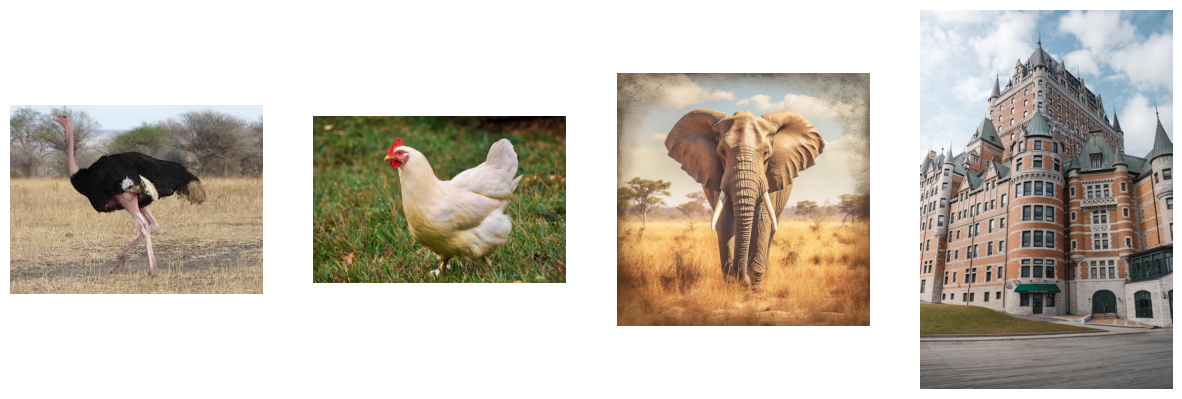

In [2]:
# URLs de imágenes de ejemplo
image_urls = [
    "https://tinyurl.com/263l885h",
    "https://tinyurl.com/23rldhsn",
    "https://tinyurl.com/223rswnh",
    "https://tinyurl.com/29mg2alk"
]

images = []
for url in image_urls:
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Check for HTTP errors
    try:
        image = Image.open(response.raw)
        images.append(image)
    except UnidentifiedImageError:
        print(f"Failed to open image from {url}")

# Mostrar imágenes
fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()


#### Ejercicio 3: Procesamiento de Imágenes y Predicciones

**Objetivo:** Procesar las imágenes utilizando el feature extractor y realizar predicciones con el modelo DeiT.

In [3]:
# Procesar imágenes
# Completa el código para procesar las imágenes utilizando el feature extractor
inputs = feature_extractor(images=images, return_tensors="pt")

# Hacer predicciones
with torch.no_grad():
    outputs = model(**inputs)

# Obtener las predicciones
logits = outputs.logits.softmax(dim=-1)

# Obtener los top 5 índices de clases
top_5_predictions = torch.topk(logits, 5, dim=-1)

# Convertir índices y valores a listas
top_5_indices = top_5_predictions.indices.tolist()
top_5_values = top_5_predictions.values.tolist()

# Mapear índices a etiquetas de clase
labels = model.config.id2label

for i, image_indices in enumerate(top_5_indices):
    print(f"Imagen {i+1}:")
    for j, index in enumerate(image_indices):
        label = labels[index]
        confidence = top_5_values[i][j]
        print(f"  {j+1}: {label} (confianza: {confidence:.4f})")


Imagen 1:
  1: ostrich, Struthio camelus (confianza: 0.9984)
  2: bustard (confianza: 0.0001)
  3: black grouse (confianza: 0.0000)
  4: black stork, Ciconia nigra (confianza: 0.0000)
  5: European gallinule, Porphyrio porphyrio (confianza: 0.0000)
Imagen 2:
  1: hen (confianza: 0.9975)
  2: cock (confianza: 0.0021)
  3: partridge (confianza: 0.0001)
  4: ptarmigan (confianza: 0.0000)
  5: goose (confianza: 0.0000)
Imagen 3:
  1: African elephant, Loxodonta africana (confianza: 0.8127)
  2: tusker (confianza: 0.1862)
  3: zebra (confianza: 0.0002)
  4: Indian elephant, Elephas maximus (confianza: 0.0001)
  5: barn (confianza: 0.0000)
Imagen 4:
  1: palace (confianza: 0.8697)
  2: castle (confianza: 0.0794)
  3: church, church building (confianza: 0.0383)
  4: library (confianza: 0.0015)
  5: prison, prison house (confianza: 0.0013)


## Fine Tuning con el dataset Beans

El dataset "Beans" es un conjunto de datos de imágenes que se utiliza para la clasificación de hojas de frijol en tres categorías distintas: hojas sanas, hojas con síntomas de roya y hojas con síntomas de ácaros.

### Estructura del dataset

El dataset contiene las siguientes columnas:
- `image`: La imagen de la hoja de frijol.
- `labels`: La etiqueta de clasificación correspondiente a la imagen, con los valores:
  - 0: Healthy (Sana)
  - 1: Angular Leaf Spot (Mancha angular de la hoja)
  - 2: Bean Rust (Roya del frijol)

### Estadísticas del dataset

El dataset "Beans" tiene tres divisiones:
- `train`: Contiene 1034 imágenes de entrenamiento.
- `validation`: Contiene 133 imágenes de validación.
- `test`: Contiene 128 imágenes de prueba.



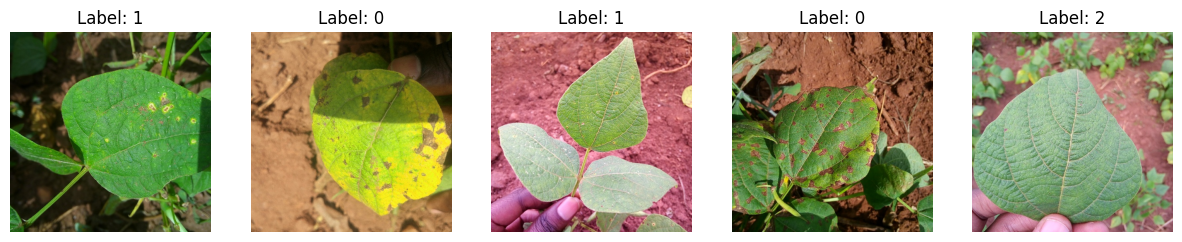

In [142]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
dataset = load_dataset('beans')

# Mostrar algunos ejemplos del dataset
def show_examples(dataset, num_examples=5):
    fig, axs = plt.subplots(1, num_examples, figsize=(15, 15))
    for i, example in enumerate(dataset.shuffle(seed=42).select(range(num_examples))):
        image = np.array(example['image'])
        label = example['labels']
        axs[i].imshow(image)
        axs[i].set_title(f'Label: {label}')
        axs[i].axis('off')
    plt.show()

# Mostrar ejemplos del conjunto de entrenamiento
show_examples(dataset['train'])

### Preprocesamiento de Imágenes

Recordemos que debemos modificar el dataset para que las imágenes se encuentren en un campo del dataset llamado "pixel_values". Así que generamos una función que lleve adelante este cambio y definimos algunas otras transformaciones de rutina.

In [146]:
from datasets import load_dataset
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Cargar el dataset
dataset = load_dataset('beans')

# Definir una transformación usando torchvision
transform = transforms.Compose([
    transforms.Resize((224, 224)),       # Redimensionar la imagen a 224x224 píxeles
    transforms.ToTensor(),               # Convertir la imagen a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar la imagen
])

# Función de transformación
def transform_function(example):
    example['pixel_values'] = [transform(img) for img in example['image']]# Aplicar las transformaciones y guardarlas como 'pixel_values'
    return example

# Aplicar la transformación al dataset
dataset = dataset.map(transform_function, batched=True)

# Remover la columna original de 'image'
dataset = dataset.remove_columns(['image'])




### Ejercicio 4: Fine Tuning

Usando el ejemplo de la clase, defina todo lo necesario para llevar adelante un finetuning en HuggingFace usando el modelo DeiT y el dataset beans.

In [147]:
from transformers import DeiTForImageClassification, DeiTFeatureExtractor, TrainingArguments, Trainer
import torch

# Cargar el feature extractor y el modelo DeiT
feature_extractor = DeiTFeatureExtractor.from_pretrained('facebook/deit-base-distilled-patch16-224')
model = DeiTForImageClassification.from_pretrained('facebook/deit-base-distilled-patch16-224', num_labels=3)

# Configurar los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=16,
    evaluation_strategy="epoch",
    num_train_epochs=3,
    save_strategy="epoch",
    remove_unused_columns=False,
    push_to_hub=False,
)

# Definir el trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['validation'],
    tokenizer=feature_extractor,
)

# Entrenar el modelo
trainer.train()


Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 